## 生成数据

In [1]:
import numpy as np
def create_dataset():
    group= np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels

## knn分类器

In [2]:
import operator

# input:    dataset     类型：np.array
#           labels      类型：np.array
#           k           类型：int
# output:   labels      类型：np.array
def classify0(input, dataset, labels, k):
    dataSetSize=dataset.shape[0]
    test_size=input.shape[0]
    result=[]
    for i in range(test_size):
        temp1= np.tile(input[i], (dataSetSize, 1)) - dataset
        distance=np.sum(temp1**2,axis=1)
        index=distance.argsort()

        labelscount={}
        for i in range(k):
            votelabels=labels[index[i]]
            labelscount[votelabels]=labelscount.get(votelabels,0)+1

        sortedClassCount=sorted(labelscount.items(),key=operator.itemgetter(1),reverse=True)
        result.append(sortedClassCount[0][0])
    result=np.array(result)
    return result

## 测试分类器

In [4]:
dataset, lables=create_dataset()
input=np.array([[0.9, 0.9],[0.2,0.2]])
result=classify0(input, dataset, lables, k=4)
print(result)

['A' 'B']


## 处理数据

In [5]:
# input:    datingTestSet2
# output:   data labels
def file2matrix(filename):
    data=[]
    labels=[]
    with open(filename) as fr:
        lines = fr.readlines()

        for line in lines:
            line=line.strip()
            line=line.split()
            features=line[0:3]
            data.append(features)
            labels.append(line[3])

    data=np.array(data).astype(dtype=float)
    labels=np.array(labels).astype(dtype=int)
    return data,labels

## 散点图显示出数据

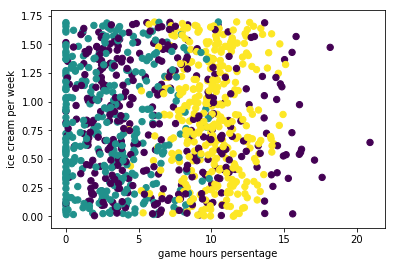

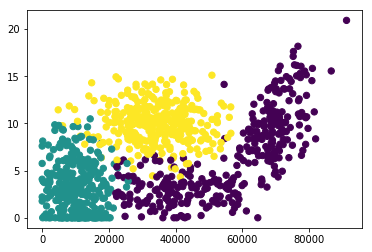

In [42]:
filename='datingTestSet2.txt'
data,labels=file2matrix(filename)

import matplotlib.pyplot as plt
fig=plt.figure()
plt.xlabel("game hours persentage")
plt.ylabel("ice cream per week")

plt.scatter(data[:,1],data[:,2],s=40,c=np.array(labels))
plt.show()

plt.scatter(data[:,0],data[:,1],s=40,c=np.array(labels))
plt.show()

#### ？？？？？？如何使用legend

## 归一化

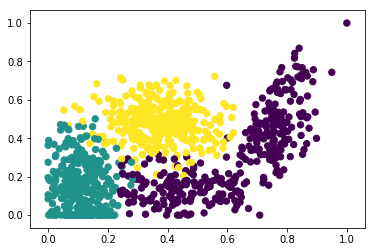

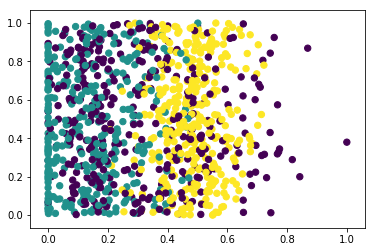

In [41]:
def auto_norm(data):
        min_value=data.min(0)
        max_value=data.max(0)        
        ranges=max_value-min_value

        data=data-min_value
        data=data/ranges
        return data
    
norm_data=auto_norm(data)
plt.scatter(norm_data[:,0],norm_data[:,1],s=40,c=np.array(labels))
plt.show()
plt.scatter(norm_data[:,1],norm_data[:,2],s=40,c=np.array(labels))
plt.show()

## 分类器测试代码

In [ ]:
def classfier_test():
    